<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Delhi/aapDelhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
!git clone https://github.com/raishagun/Election-Prediction.git

fatal: destination path 'Election-Prediction' already exists and is not an empty directory.


In [103]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"AAP Delhi"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('aap_delhi.csv',index = False)

Streaming output truncated to the last 5000 lines.
False
@ANI I don't know what kind of party is this AAP..Delhi govt cannot handle a single issue on it's own, everywhere they create a mess, but they advertise as if they have conquered the world.. their irritating ads on all the channels every 2 min is pure torture..
preetijoshi2015

Twitter Web App
0
118
300
0
<--------------------------------------------------->
1788
2020-11-16 17:44:57
1328393635268681730
False
#indiavsgupkargang One question tho BJP fan since the start , why did people of delhi reject modi WAVE for their state while the same people who voted for AAP in state elections, ACCEPTED #MODI WAVE AND WASHED OUT AAP IN GENERAL ELECTIONS LIKE WHATS THE IDEOLOGY OF DELHI PEOPLE ?
idontcarebuti
apna kaam kar 
Twitter for Android
0
13
54
0
<--------------------------------------------------->
1789
2020-11-16 17:42:18
1328392968970006528
False
@OpIndia_com Ome question tho BJP fan since the start , why did people do delhi reject

In [104]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2141 non-null   datetime64[ns]
 1   Tweet_id   2141 non-null   int64         
 2   Verified   2141 non-null   bool          
 3   Tweet      2141 non-null   object        
 4   User       2141 non-null   object        
 5   Location   2141 non-null   object        
 6   Source     2141 non-null   object        
 7   Likes      2141 non-null   int64         
 8   Followers  2141 non-null   int64         
 9   Following  2141 non-null   int64         
 10  Retweets   2141 non-null   int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 169.5+ KB


In [106]:
df.shape

(2141, 11)

In [107]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [108]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [109]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [110]:
df['Source'].value_counts()

Twitter for Android               1089
Twitter Web App                    533
Twitter for iPhone                 288
Twitter Media Studio - LiveCut      48
TweetDeck                           41
IFTTT                               22
cmssocialservice                    19
Twitter for iPad                    19
Buffer                              12
Twitter Media Studio                 9
Hootsuite Inc.                       8
NDTVfeed                             6
Devdiscourse News Desk               6
ht-twitter-handler                   6
WordPress.com                        6
omgoa                                4
PTI_Tweets                           4
Hocalwire Social Share               3
Rajneeti News                        3
econ b2b post                        2
Tweet Suite                          2
The Tweeted Times                    1
Republicworld                        1
HW news english                      1
Blood Donors India                   1
StateTimestw             

In [111]:
df['Location'].nunique()

419

In [112]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

2141

In [113]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


2116

In [114]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [115]:
df['Tweet'].duplicated().sum()

25

In [116]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(2116, 11)

In [117]:
df['Tweet'].duplicated().sum()

0

In [119]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [120]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [121]:
df.shape

(2116, 12)

In [122]:
df['Processed_Tweet']

0       @NarinderKaurAAP @BhagwantMann @AAPPunjab @Jar...
1       @Dubai_Indian_1 @TimesNow @Dev_Fadnavis Don't ...
2       AAP as party in delhi correct may be ! But In ...
3       @yudii222 @CMODelhi @ArvindKejriwal @Satyendar...
4       @ExSecular It’s almost the time AAP is going t...
                              ...                        
2111    @vijaythottathil @Riyadenny He just cheat us w...
2112    @Ch_AnilKumarINC Things were completely differ...
2113    Rained 15 min in Delhi. God has his own ways o...
2114    @DrVW30 I have great respecr for AAP cause of ...
2115    @Gss_Views @MrsGandhi Coming back to the quest...
Name: Processed_Tweet, Length: 2116, dtype: object

In [123]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0       @NarinderKaurAAP @BhagwantMann @AAPPunjab @Jar...
1       @Dubai_Indian_1 @TimesNow @Dev_Fadnavis Don't ...
2       AAP as party in delhi correct may be ! But In ...
3       @yudii222 @CMODelhi @ArvindKejriwal @Satyendar...
4       @ExSecular It’s almost the time AAP is going t...
                              ...                        
2111    @vijaythottathil @Riyadenny He just cheat us w...
2112    @Ch_AnilKumarINC Things were completely differ...
2113    Rained 15 min in Delhi. God has his own ways o...
2114    @DrVW30 I have great respecr for AAP cause of ...
2115    @Gss_Views @MrsGandhi Coming back to the quest...
Name: Processed_Tweet, Length: 2116, dtype: object

In [124]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0                 It’s quite shocking to note that AAP...
1             Don't be angree live and let live. Puran...
2       AAP as party in delhi correct may be ! But In ...
3                 And I would still vote for AAP. Peop...
4         It’s almost the time AAP is going to come up...
                              ...                        
2111        He just cheat us with his hidden agenda......
2112      Things were completely different when Congre...
2113    Rained 15 min in Delhi. God has his own ways o...
2114      I have great respecr for AAP cause of their ...
2115        Coming back to the question- how many AAP ...
Name: Processed_Tweet, Length: 2116, dtype: object

In [125]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0                 It’s quite shocking to note that AAP...
1             Don't be angree live and let live. Puran...
2       AAP as party in delhi correct may be ! But In ...
3                 And I would still vote for AAP. Peop...
4         It’s almost the time AAP is going to come up...
                              ...                        
2111        He just cheat us with his hidden agenda......
2112      Things were completely different when Congre...
2113    Rained 15 min in Delhi. God has his own ways o...
2114      I have great respecr for AAP cause of their ...
2115        Coming back to the question- how many AAP ...
Name: Processed_Tweet, Length: 2116, dtype: object

In [126]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0                 It’s quite shocking to note that AAP...
1             Don't be angree live and let live. Puran...
2       AAP as party in delhi correct may be ! But In ...
3                 And I would still vote for AAP. Peop...
4         It’s almost the time AAP is going to come up...
                              ...                        
2111        He just cheat us with his hidden agenda......
2112      Things were completely different when Congre...
2113    Rained 15 min in Delhi. God has his own ways o...
2114      I have great respecr for AAP cause of their ...
2115        Coming back to the question- how many AAP ...
Name: Processed_Tweet, Length: 2116, dtype: object

In [127]:
!pip install tweet-preprocessor

In [128]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0       Its quite shocking to note that AAP is continu...
1       Don't be angree live and let live. Purani Laho...
2       AAP as party in delhi correct may be ! But In ...
3       And I would still vote for AAP. People in Delh...
4       Its almost the time AAP is going to come up wi...
                              ...                        
2111    He just cheat us with his hidden agenda... BJP...
2112    Things were completely different when Congress...
2113    Rained min in Delhi. God has his own ways of r...
2114    I have great respecr for AAP cause of their ed...
2115    Coming back to the question- how many AAP lead...
Name: Processed_Tweet, Length: 2116, dtype: object

In [129]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0       Its quite shocking to note that AAP is continu...
1       Don t be angree live and let live  Purani Laho...
2       AAP as party in delhi correct may be   But In ...
3       And I would still vote for AAP  People in Delh...
4       Its almost the time AAP is going to come up wi...
                              ...                        
2111    He just cheat us with his hidden agenda    BJP...
2112    Things were completely different when Congress...
2113    Rained min in Delhi  God has his own ways of r...
2114    I have great respecr for AAP cause of their ed...
2115    Coming back to the question  how many AAP lead...
Name: Processed_Tweet, Length: 2116, dtype: object

In [130]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0       its quite shocking to note that aap is continu...
1       don t be angree live and let live  purani laho...
2       aap as party in delhi correct may be   but in ...
3       and i would still vote for aap  people in delh...
4       its almost the time aap is going to come up wi...
                              ...                        
2111    he just cheat us with his hidden agenda    bjp...
2112    things were completely different when congress...
2113    rained min in delhi  god has his own ways of r...
2114    i have great respecr for aap cause of their ed...
2115    coming back to the question  how many aap lead...
Name: Processed_Tweet, Length: 2116, dtype: object

In [131]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'btw i m not a bjp sanghi or running politics against aap  an indian wch ruins delhi spills over    affects all of us '

In [132]:
df['User'].value_counts()

rmkarki            54
sumanvdeshpande    46
6558CnpMHjmRU0L    21
CNNnews18          21
TimesNow           16
                   ..
rajeevKannan17      1
pkjkmr21            1
Dhriyamana          1
MILVETERAN          1
JSatyamev           1
Name: User, Length: 1474, dtype: int64

In [133]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


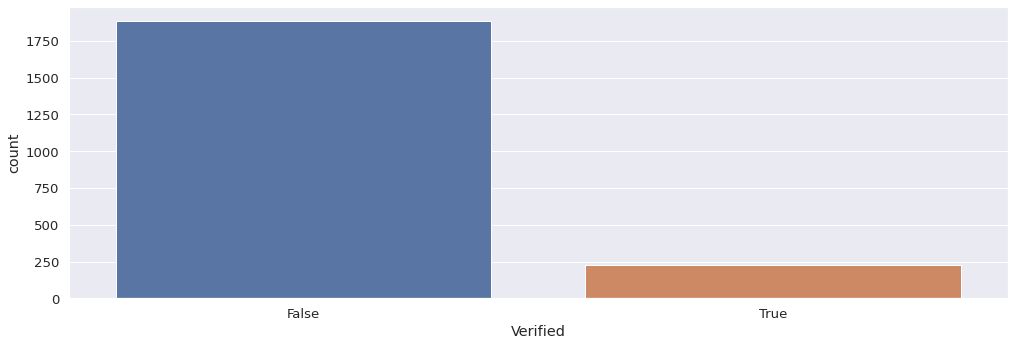

In [134]:
bar = sns.countplot(df['Verified'])

In [135]:
df['Verified'].value_counts()

False    1888
True      228
Name: Verified, dtype: int64

In [136]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

CNNnews18          21
TimesNow           16
IndiaToday         15
TheDailyPioneer    10
TOIDelhi           10
                   ..
CPR_India           1
timesofindia        1
Outlookindia        1
ABPNews             1
firstpost           1
Name: User, Length: 82, dtype: int64

In [137]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 97, 16: 265, 17: 362, 18: 358, 19: 434, 20: 411, 21: 189})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

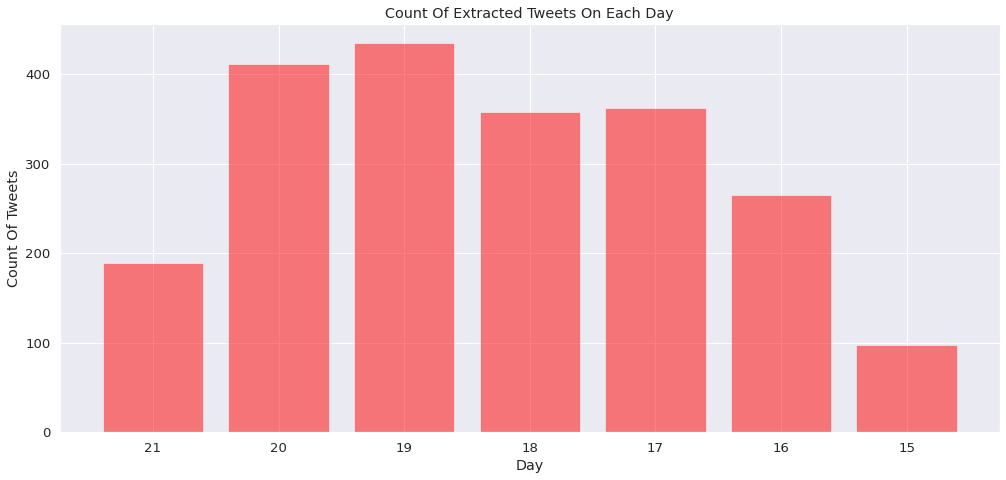

In [138]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [139]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({0: 20,
         1: 35,
         2: 63,
         3: 69,
         4: 85,
         5: 81,
         6: 81,
         7: 120,
         8: 134,
         9: 122,
         10: 117,
         11: 126,
         12: 111,
         13: 145,
         14: 165,
         15: 129,
         16: 165,
         17: 159,
         18: 93,
         19: 45,
         20: 17,
         21: 9,
         22: 13,
         23: 12})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

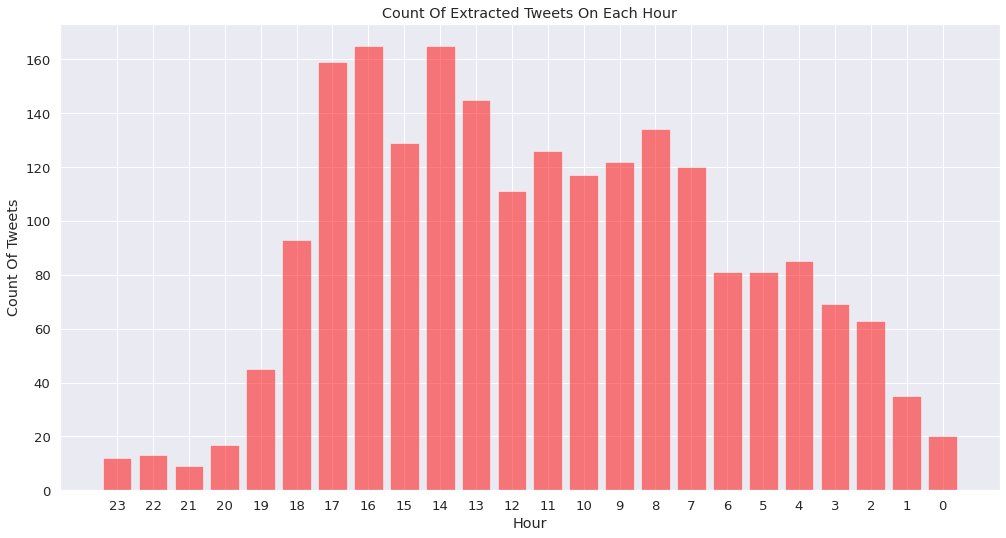

In [140]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [141]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [142]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [143]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['until', 'but', 'me', 'ain', 'ourselves', 'below', 'through', "didn't", 'mightn', 'we', 'won', 'shouldn', 'hers', 'that', 'into', 'is', 'by', 'up', 'again', "hadn't", 'yourself', 'does', 'have', "wouldn't", 'and', "weren't", 'because', 'did', "you'll", 'the', "aren't", 'here', "mightn't", 'needn', "shan't", 'y', 'on', 'over', 'aren', 'weren', 'further', 'm', "haven't", 'himself', 'its', 'him', 'she', 'theirs', 'just', "needn't", 'these', 'once', "doesn't", 's', "hasn't", 'shan', 'this', 'isn', 'for', 'all', "shouldn't", 'when', 'having', 'those', 'out', 'few', 'doesn', 'only', 'who', 'herself', 've', 'haven', 'such', 'our', 'with', 'in', 'so', 'hadn', 'during', 'hasn', 'nor', 'after', 'off', 'more', 'my', 'itself', 'an', 'of', "won't", 'from', 'do', 'above', 'being', 'has', 'he', 'which', 'your', 'd', 'don', 'before', 'under', 'didn', 'both', 'be', 'a', 'will', 're', 'each', 'most', 'yours', 'own', 'his', 'between', 'to', 'there', "wasn't", 'had', 'or', "isn't", "don't", 'at', 'themse

In [144]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0       quite shocking note aap continuing super sprea...
1       angree live let live purani lahore k darwaza h...
2       aap party delhi correct may karnataka human ri...
3       would still vote aap people delhi see real wor...
4       almost time aap going come conspiracy theory s...
                              ...                        
2111    cheat us hidden agenda bjp agentnext election ...
2112    things completely different congress leading d...
2113    rained min delhi god ways reducing pollution a...
2114    great respecr aap cause educational developmen...
2115    coming back question many aap leaders sending ...
Name: Processed_Tweet, Length: 2116, dtype: object

In [145]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0       [quite, shocking, note, aap, continuing, super...
1       [angree, live, let, live, purani, lahore, k, d...
2       [aap, party, delhi, correct, may, karnataka, h...
3       [would, still, vote, aap, people, delhi, see, ...
4       [almost, time, aap, going, come, conspiracy, t...
                              ...                        
2111    [cheat, us, hidden, agenda, bjp, agentnext, el...
2112    [things, completely, different, congress, lead...
2113    [rained, min, delhi, god, ways, reducing, poll...
2114    [great, respecr, aap, cause, educational, deve...
2115    [coming, back, question, many, aap, leaders, s...
Name: Processed_Tweet, Length: 2116, dtype: object

In [146]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0       [quit, shock, note, aap, continu, super, sprea...
1       [angre, live, let, live, purani, lahor, k, dar...
2       [aap, parti, delhi, correct, may, karnataka, h...
3       [would, still, vote, aap, peopl, delhi, see, r...
4       [almost, time, aap, go, come, conspiraci, theo...
                              ...                        
2111    [cheat, us, hidden, agenda, bjp, agentnext, el...
2112    [thing, complet, differ, congress, lead, delhi...
2113    [rain, min, delhi, god, way, reduc, pollut, aa...
2114    [great, respecr, aap, caus, educ, develop, del...
2115    [come, back, question, mani, aap, leader, send...
Name: Processed_Tweet, Length: 2116, dtype: object

In [147]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 23:17:54,1330289363549360128,False,@NarinderKaurAAP @BhagwantMann @AAPPunjab @Jar...,CrusaderSingh22,London,Twitter for iPhone,0,64,55,0,"[quit, shock, note, aap, continu, super, sprea..."
1,2020-11-21 22:58:42,1330284530964570114,False,@Dubai_Indian_1 @TimesNow @Dev_Fadnavis Don't ...,mianmuhmmad1,"Lahore, Pakistan",Twitter for Android,4,88,276,0,"[angre, live, let, live, purani, lahor, darwaz..."
2,2020-11-21 21:53:53,1330268221220548615,False,AAP as party in delhi correct may be ! But In ...,GodyalNagaraj,"Andhra Pradesh,India",Twitter Web App,0,48,3239,0,"[aap, parti, delhi, correct, may, karnataka, h..."
3,2020-11-21 20:18:17,1330244160499175427,False,@yudii222 @CMODelhi @ArvindKejriwal @Satyendar...,LAutreGarcon,"New Delhi, India",Twitter for Android,0,98,233,0,"[would, still, vote, aap, peopl, delhi, see, r..."
4,2020-11-21 19:55:02,1330238309461872642,False,@ExSecular It’s almost the time AAP is going t...,SadanandSudeer,,Twitter for iPhone,2,53,225,0,"[almost, time, aap, come, conspiraci, theori, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2111,2020-11-15 12:38:24,1327954100827336704,False,@vijaythottathil @Riyadenny He just cheat us w...,jaison3012,"New Delhi, India",Twitter Web App,2,82,415,0,"[cheat, hidden, agenda, bjp, agentnext, elect,..."
2112,2020-11-15 12:29:01,1327951741397069826,False,@Ch_AnilKumarINC Things were completely differ...,Amit_CH_INC,"New Delhi, India",Twitter for Android,0,2257,604,0,"[thing, complet, differ, congress, lead, delhi..."
2113,2020-11-15 12:07:16,1327946267138224135,False,Rained 15 min in Delhi. God has his own ways o...,kannandelhi,India,Twitter for Android,6,850,985,0,"[rain, min, delhi, god, way, reduc, pollut, aa..."
2114,2020-11-15 12:04:45,1327945633861300224,False,@DrVW30 I have great respecr for AAP cause of ...,jaha_mehta,,Twitter for Android,1,10,88,0,"[great, respecr, aap, caus, educ, develop, del..."


In [148]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

38313

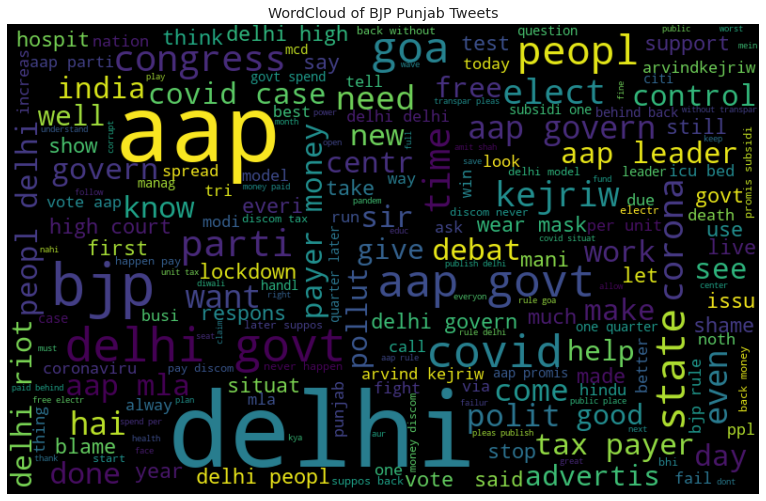

In [149]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of BJP Punjab Tweets")
plt.show()

In [150]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

2116

In [151]:
len(text)

38313

In [152]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 849
Negative Tweets: 434
Neutral Tweets 833


In [153]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [154]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

In [155]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.279,0.580,0.141,-0.4215
1,0.078,0.922,0.000,-0.4939
2,0.000,0.890,0.110,0.2732
3,0.000,0.828,0.172,0.3612
4,0.111,0.783,0.106,-0.0258
...,...,...,...,...
2111,0.119,0.830,0.051,-0.4019
2112,0.000,1.000,0.000,0.0000
2113,0.000,0.826,0.174,0.2732
2114,0.000,0.872,0.128,0.6249


In [156]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.279,0.580,0.141,-0.4215,Negative
1,0.078,0.922,0.000,-0.4939,Negative
2,0.000,0.890,0.110,0.2732,Positive
3,0.000,0.828,0.172,0.3612,Positive
4,0.111,0.783,0.106,-0.0258,Negative


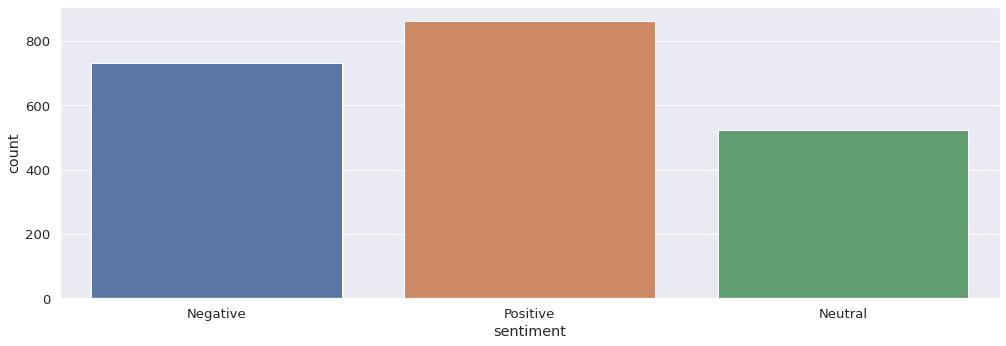

In [157]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [158]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Delhi/aap_delhi.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

4036

In [159]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [161]:
word_emotion=dict()
for i in range(0,1331):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [162]:
from numpy import nan
nan == nan


False

In [163]:
for i in range(0,3346):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

KeyError: ignored

In [ ]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

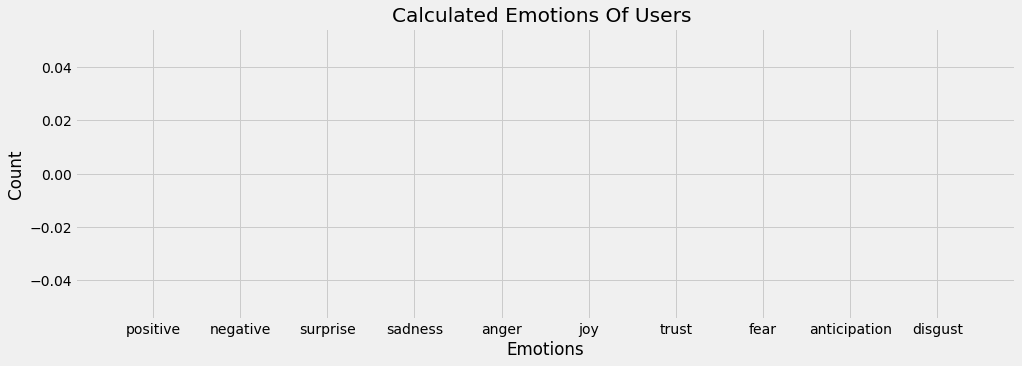

In [62]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [63]:
df.Location  = df.Location.fillna('USA')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [64]:
df.Location = df.Location.apply(lambda x: x.replace('United States','USA'))
df.Location.value_counts()

                     197
India                 61
New Delhi, India      18
Worldwide             14
Chandigarh, India     13
                    ... 
Arrakis                1
INDIA                  1
Hindustan              1
✨                      1
Phagwara, Punjab       1
Name: Location, Length: 205, dtype: int64

In [164]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 23:17:54,1330289363549360128,False,@NarinderKaurAAP @BhagwantMann @AAPPunjab @Jar...,CrusaderSingh22,London,Twitter for iPhone,0,64,55,0,"[quit, shock, note, aap, continu, super, sprea...",London
1,2020-11-21 22:58:42,1330284530964570114,False,@Dubai_Indian_1 @TimesNow @Dev_Fadnavis Don't ...,mianmuhmmad1,"Lahore, Pakistan",Twitter for Android,4,88,276,0,"[angre, live, let, live, purani, lahor, darwaz...",Lahore
2,2020-11-21 21:53:53,1330268221220548615,False,AAP as party in delhi correct may be ! But In ...,GodyalNagaraj,"Andhra Pradesh,India",Twitter Web App,0,48,3239,0,"[aap, parti, delhi, correct, may, karnataka, h...",Andhra Pradesh
3,2020-11-21 20:18:17,1330244160499175427,False,@yudii222 @CMODelhi @ArvindKejriwal @Satyendar...,LAutreGarcon,"New Delhi, India",Twitter for Android,0,98,233,0,"[would, still, vote, aap, peopl, delhi, see, r...",New Delhi
4,2020-11-21 19:55:02,1330238309461872642,False,@ExSecular It’s almost the time AAP is going t...,SadanandSudeer,,Twitter for iPhone,2,53,225,0,"[almost, time, aap, come, conspiraci, theori, ...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,2020-11-15 12:38:24,1327954100827336704,False,@vijaythottathil @Riyadenny He just cheat us w...,jaison3012,"New Delhi, India",Twitter Web App,2,82,415,0,"[cheat, hidden, agenda, bjp, agentnext, elect,...",New Delhi
2112,2020-11-15 12:29:01,1327951741397069826,False,@Ch_AnilKumarINC Things were completely differ...,Amit_CH_INC,"New Delhi, India",Twitter for Android,0,2257,604,0,"[thing, complet, differ, congress, lead, delhi...",New Delhi
2113,2020-11-15 12:07:16,1327946267138224135,False,Rained 15 min in Delhi. God has his own ways o...,kannandelhi,India,Twitter for Android,6,850,985,0,"[rain, min, delhi, god, way, reduc, pollut, aa...",India
2114,2020-11-15 12:04:45,1327945633861300224,False,@DrVW30 I have great respecr for AAP cause of ...,jaha_mehta,,Twitter for Android,1,10,88,0,"[great, respecr, aap, caus, educ, develop, del...",


In [165]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [166]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2020-11-21 23:17:54,1330289363549360128,False,@NarinderKaurAAP @BhagwantMann @AAPPunjab @Jar...,CrusaderSingh22,London,Twitter for iPhone,0,64,55,0,"[quit, shock, note, aap, continu, super, sprea...",London,Negative,21
1,2020-11-21 22:58:42,1330284530964570114,False,@Dubai_Indian_1 @TimesNow @Dev_Fadnavis Don't ...,mianmuhmmad1,"Lahore, Pakistan",Twitter for Android,4,88,276,0,"[angre, live, let, live, purani, lahor, darwaz...",Lahore,Negative,21
2,2020-11-21 21:53:53,1330268221220548615,False,AAP as party in delhi correct may be ! But In ...,GodyalNagaraj,"Andhra Pradesh,India",Twitter Web App,0,48,3239,0,"[aap, parti, delhi, correct, may, karnataka, h...",Andhra Pradesh,Positive,21
3,2020-11-21 20:18:17,1330244160499175427,False,@yudii222 @CMODelhi @ArvindKejriwal @Satyendar...,LAutreGarcon,"New Delhi, India",Twitter for Android,0,98,233,0,"[would, still, vote, aap, peopl, delhi, see, r...",New Delhi,Positive,21
4,2020-11-21 19:55:02,1330238309461872642,False,@ExSecular It’s almost the time AAP is going t...,SadanandSudeer,,Twitter for iPhone,2,53,225,0,"[almost, time, aap, come, conspiraci, theori, ...",,Negative,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


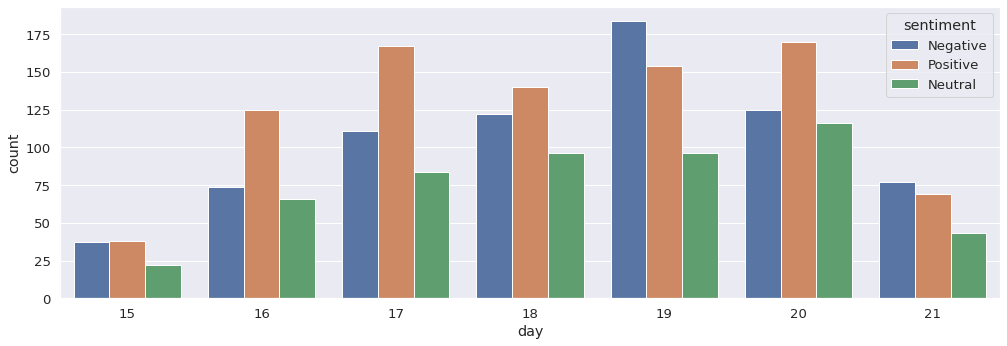

In [167]:
sns.countplot(df['day'],hue = df['sentiment'])

In [168]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [169]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2020-11-21 23:17:54,1330289363549360128,False,@NarinderKaurAAP @BhagwantMann @AAPPunjab @Jar...,CrusaderSingh22,London,Twitter for iPhone,0,64,55,0,"[quit, shock, note, aap, continu, super, sprea...",London,Negative,21,0
1,2020-11-21 22:58:42,1330284530964570114,False,@Dubai_Indian_1 @TimesNow @Dev_Fadnavis Don't ...,mianmuhmmad1,"Lahore, Pakistan",Twitter for Android,4,88,276,0,"[angre, live, let, live, purani, lahor, darwaz...",Lahore,Negative,21,0
2,2020-11-21 21:53:53,1330268221220548615,False,AAP as party in delhi correct may be ! But In ...,GodyalNagaraj,"Andhra Pradesh,India",Twitter Web App,0,48,3239,0,"[aap, parti, delhi, correct, may, karnataka, h...",Andhra Pradesh,Positive,21,2
3,2020-11-21 20:18:17,1330244160499175427,False,@yudii222 @CMODelhi @ArvindKejriwal @Satyendar...,LAutreGarcon,"New Delhi, India",Twitter for Android,0,98,233,0,"[would, still, vote, aap, peopl, delhi, see, r...",New Delhi,Positive,21,2
4,2020-11-21 19:55:02,1330238309461872642,False,@ExSecular It’s almost the time AAP is going t...,SadanandSudeer,,Twitter for iPhone,2,53,225,0,"[almost, time, aap, come, conspiraci, theori, ...",,Negative,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,2020-11-15 12:38:24,1327954100827336704,False,@vijaythottathil @Riyadenny He just cheat us w...,jaison3012,"New Delhi, India",Twitter Web App,2,82,415,0,"[cheat, hidden, agenda, bjp, agentnext, elect,...",New Delhi,Negative,15,0
2112,2020-11-15 12:29:01,1327951741397069826,False,@Ch_AnilKumarINC Things were completely differ...,Amit_CH_INC,"New Delhi, India",Twitter for Android,0,2257,604,0,"[thing, complet, differ, congress, lead, delhi...",New Delhi,Neutral,15,1
2113,2020-11-15 12:07:16,1327946267138224135,False,Rained 15 min in Delhi. God has his own ways o...,kannandelhi,India,Twitter for Android,6,850,985,0,"[rain, min, delhi, god, way, reduc, pollut, aa...",India,Positive,15,2
2114,2020-11-15 12:04:45,1327945633861300224,False,@DrVW30 I have great respecr for AAP cause of ...,jaha_mehta,,Twitter for Android,1,10,88,0,"[great, respecr, aap, caus, educ, develop, del...",,Positive,15,2


In [170]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [172]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [173]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [174]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.7354330708661417
Precision Score:  0.7354330708661417
Recall Score:  0.7354330708661417
F1 Score:  0.7354330708661417


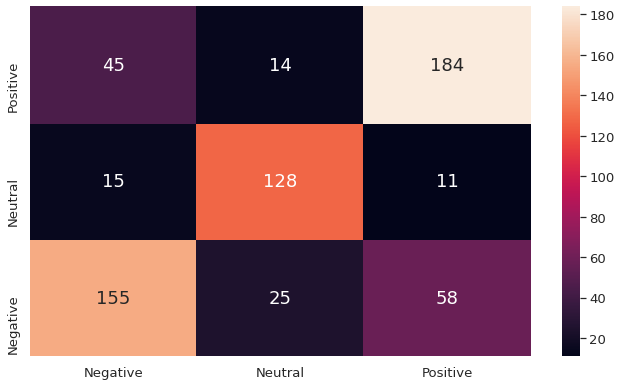

In [175]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [176]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [177]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [178]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.4888536187193905
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 9, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [179]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.4692913385826772
Precision Score:  0.4692913385826772
Recall Score:  0.4692913385826772
F1 Score:  0.4692913385826772


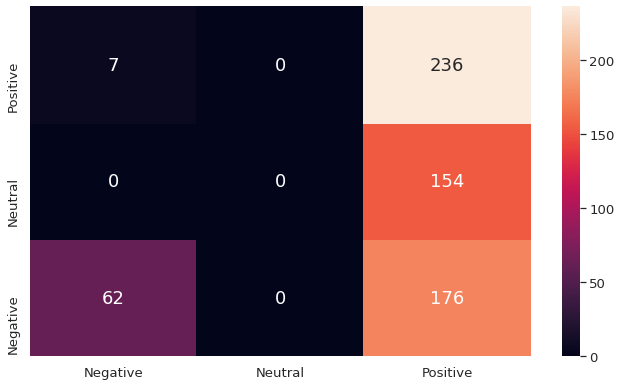

In [180]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [181]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [182]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.7496062992125985
Precision Score:  0.7496062992125985
Recall Score:  0.7496062992125985
F1 Score:  0.7496062992125985


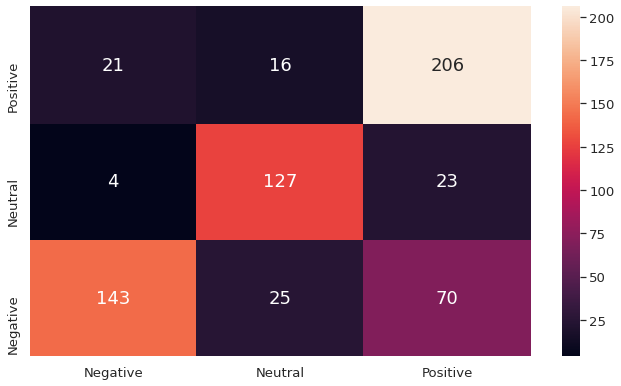

In [183]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [184]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [185]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, max_depth=8, criterion=entropy ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, max_depth=8, criterion=entropy, score=0.586, total=   0.3s
[CV] n_estimators=100, max_depth=8, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=100, max_depth=8, criterion=entropy, score=0.557, total=   0.3s
[CV] n_estimators=100, max_depth=8, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=100, max_depth=8, criterion=entropy, score=0.537, total=   0.3s
[CV] n_estimators=100, max_depth=8, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=100, max_depth=8, criterion=entropy, score=0.541, total=   0.3s
[CV] n_estimators=100, max_depth=8, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=100, max_depth=8, criterion=entropy, score=0.514, total=   0.3s
[CV] n_estimators=1100, max_depth=19, criterion=gini .................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=19, criterion=gini, score=0.636, total=   5.6s
[CV] n_estimators=1100, max_depth=19, criterion=gini .................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.3s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=19, criterion=gini, score=0.591, total=   5.6s
[CV] n_estimators=1100, max_depth=19, criterion=gini .................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   12.9s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=19, criterion=gini, score=0.608, total=   5.6s
[CV] n_estimators=1100, max_depth=19, criterion=gini .................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   18.5s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=19, criterion=gini, score=0.608, total=   5.5s
[CV] n_estimators=1100, max_depth=19, criterion=gini .................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   24.0s remaining:    0.0s


[CV]  n_estimators=1100, max_depth=19, criterion=gini, score=0.601, total=   5.6s
[CV] n_estimators=1100, max_depth=7, criterion=entropy ...............
[CV]  n_estimators=1100, max_depth=7, criterion=entropy, score=0.572, total=   3.2s
[CV] n_estimators=1100, max_depth=7, criterion=entropy ...............
[CV]  n_estimators=1100, max_depth=7, criterion=entropy, score=0.544, total=   3.4s
[CV] n_estimators=1100, max_depth=7, criterion=entropy ...............
[CV]  n_estimators=1100, max_depth=7, criterion=entropy, score=0.520, total=   3.3s
[CV] n_estimators=1100, max_depth=7, criterion=entropy ...............
[CV]  n_estimators=1100, max_depth=7, criterion=entropy, score=0.530, total=   3.4s
[CV] n_estimators=1100, max_depth=7, criterion=entropy ...............
[CV]  n_estimators=1100, max_depth=7, criterion=entropy, score=0.520, total=   3.3s
[CV] n_estimators=700, max_depth=4, criterion=entropy ................
[CV]  n_estimators=700, max_depth=4, criterion=entropy, score=0.505, tot

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


0.609029484029484
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 19, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [186]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.6125984251968504
Precision Score:  0.6125984251968504
Recall Score:  0.6125984251968504
F1 Score:  0.6125984251968504


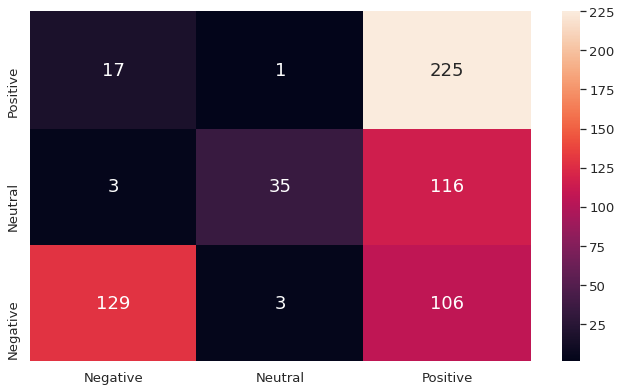

In [187]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [188]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.6787401574803149
Precision Score:  0.6787401574803149
Recall Score:  0.6787401574803149
F1 Score:  0.6787401574803149


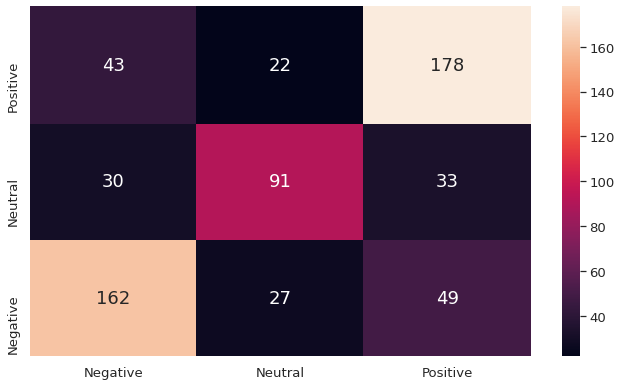

In [189]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [190]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [191]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.6421413023762016
{'alpha': 1, 'class_prior': None, 'fit_prior': True}


In [192]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.6787401574803149
Precision Score:  0.6787401574803149
Recall Score:  0.6787401574803149
F1 Score:  0.6787401574803149


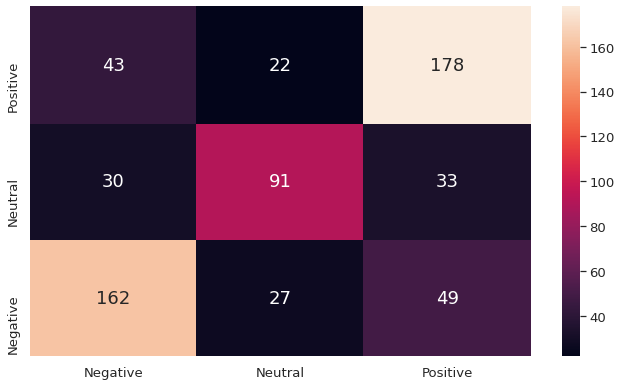

In [193]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

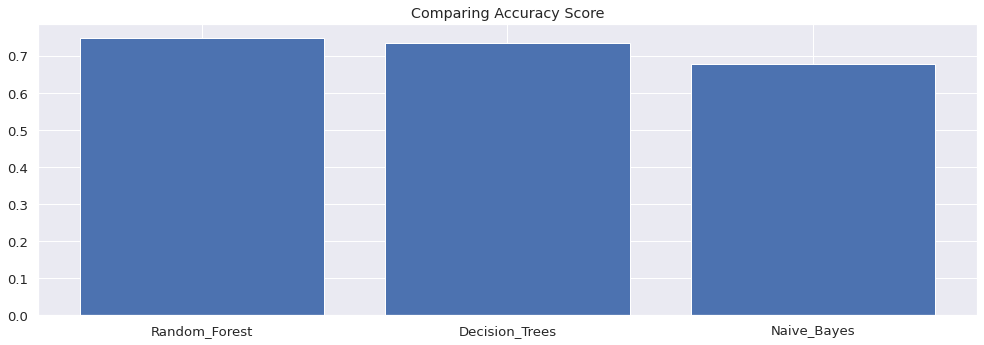

In [194]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

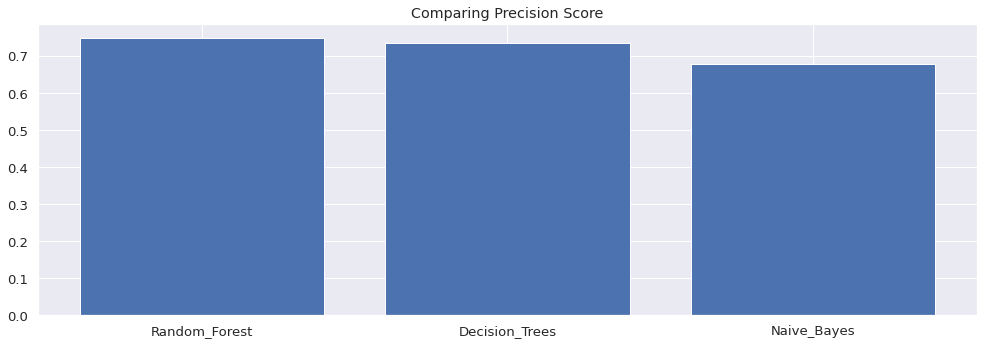

In [195]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

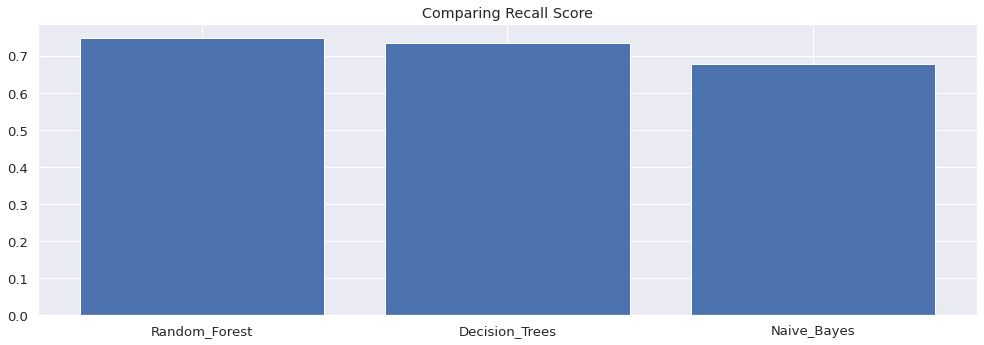

In [196]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

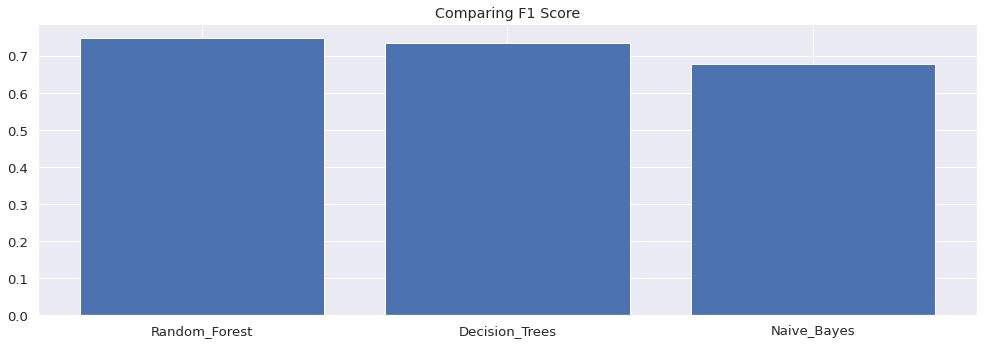

In [198]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()